# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
#displaying head rows
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
#displaying overview of dataset
df.info()

#ststistical summary of first few columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
#filling null values with mean
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace = True)
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Inflight entertainment'}>],
       [<Axes: title={'center': 'Online support'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <Axe

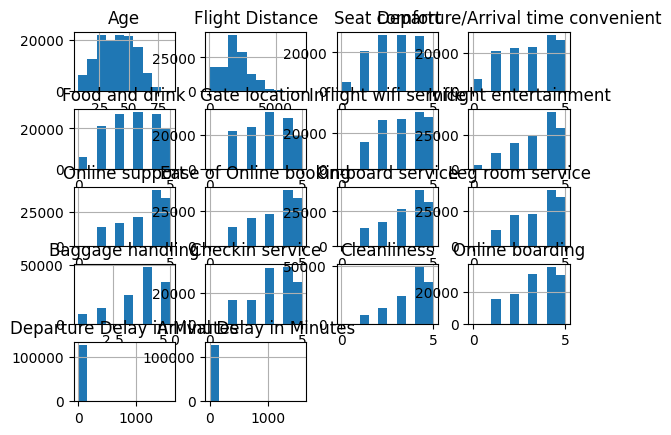

In [7]:
#plot hist to visualize data distribution
df.hist()

Statistical Summary

In [8]:
# select columns with categorical data and save column names
categoricals = list(df.select_dtypes(include=['object']).columns)

# select columns with numerical data and save column names
numericals = list(df.select_dtypes(include=['float', 'int']).columns)

categorical_count = len(df.select_dtypes(include=['object']).columns)
numerical_count = len(df.select_dtypes(include=['float', 'int']).columns)


# print column names
print('Categorical columns:', categorical_count,"->", categoricals)
print("\n")
print('Numerical columns:', numerical_count, "->",numericals)

Categorical columns: 5 -> ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


Numerical columns: 18 -> ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Numerical Columns

In [9]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [10]:
filtered_columns = [col for col in numericals if df[col].mean() > df[col].median()]

# print filtered columns
print('Numerical columns with mean greater than median:', filtered_columns)

Numerical columns with mean greater than median: ['Flight Distance', 'Inflight wifi service', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


Categorical Columns

In [11]:
df[categoricals].describe()

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


Outlier Detection

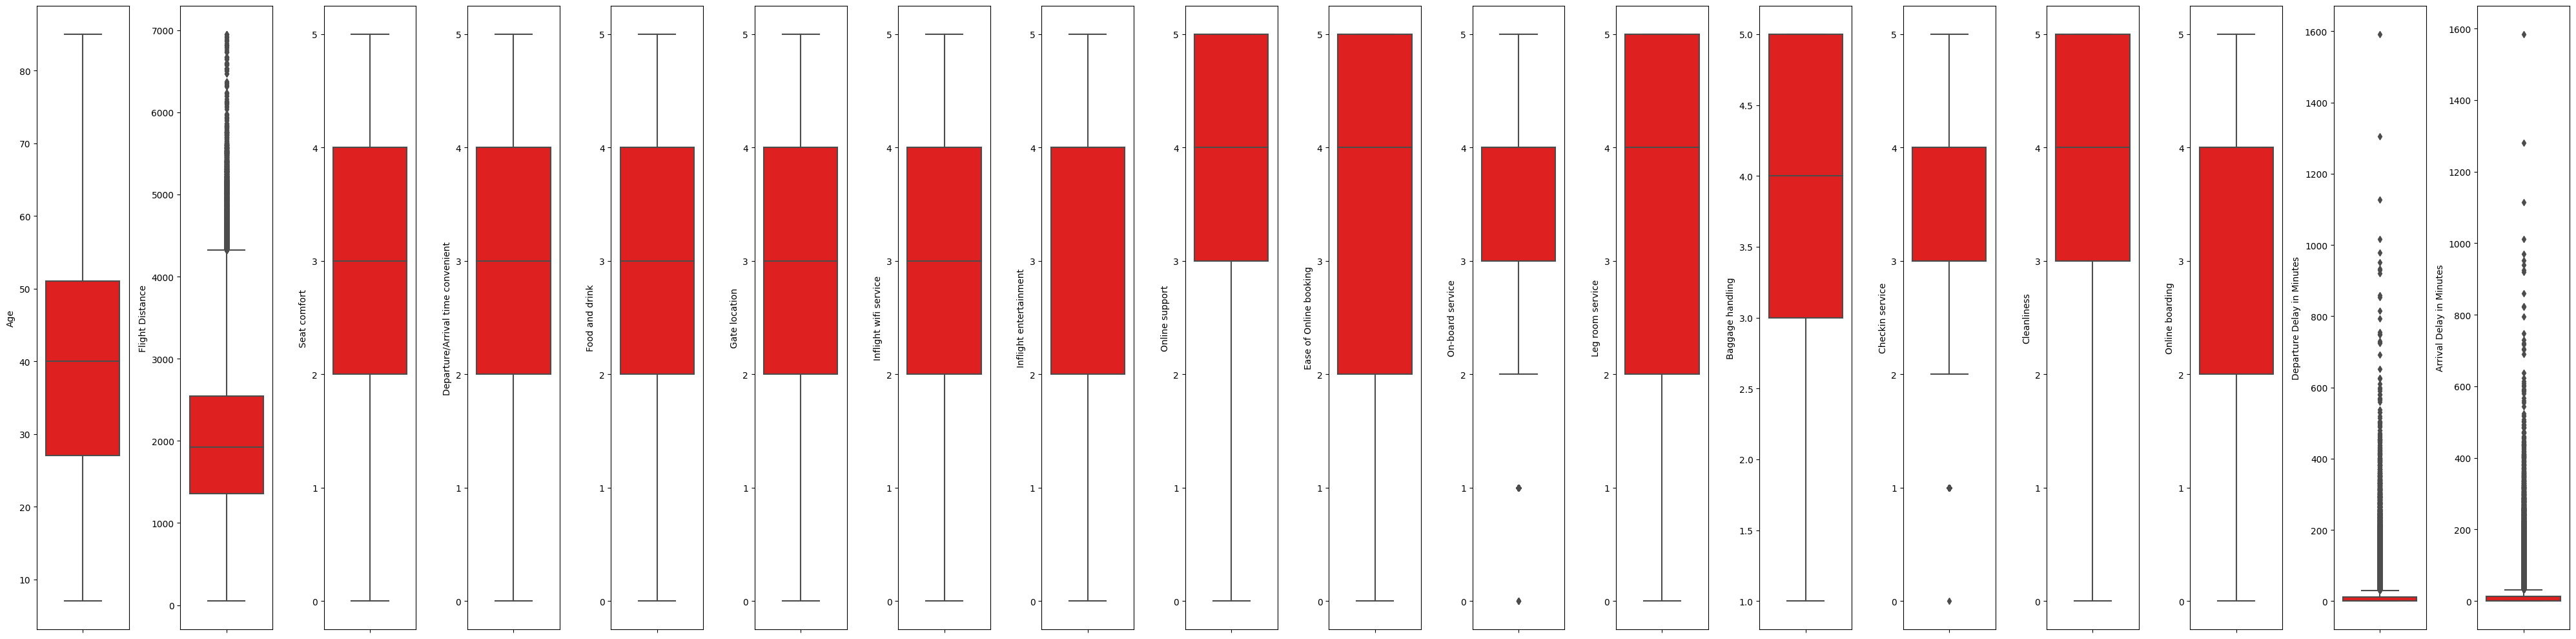

In [12]:
# adjust the figure size for better readability
plt.figure(figsize=(40,10))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Transform Categorical Columns

In [13]:
for col in categoricals:
    print(f"Unique values of {col}: {df[col].unique()}")

Unique values of satisfaction: ['satisfied' 'dissatisfied']
Unique values of Gender: ['Female' 'Male']
Unique values of Customer Type: ['Loyal Customer' 'disloyal Customer']
Unique values of Type of Travel: ['Personal Travel' 'Business travel']
Unique values of Class: ['Eco' 'Business' 'Eco Plus']


One hot encoding

In [14]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
     

Label encoding

In [15]:
df_encoded['satisfaction'] = (df_encoded['satisfaction'] != 'satisfied').astype(int)
# Reorder column
""""df_encoded = df_encoded[['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',
       'Gender_Female', 'Gender_Male', 'Customer Type_First-time',
       'Customer Type_Returning', 'Type of Travel_Business',
       'Type of Travel_Personal', 'Class_Business', 'Class_Economy',
       'Class_Economy Plus','satisfaction']]"""
df_encoded.head(3)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,65,265,0,0,0,2,2,4,2,...,0.0,True,False,True,False,False,True,False,True,False
1,0,47,2464,0,0,0,3,0,2,2,...,305.0,False,True,True,False,False,True,True,False,False
2,0,15,2138,0,0,0,3,2,0,2,...,0.0,True,False,True,False,False,True,False,True,False


# EDA

## Age

/var/folders/n4/30t414nd14sglwq8kshvsggw0000gn/T/ipykernel_7122/2399867289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Age Category'] = df_age['Age'].apply(age_category)


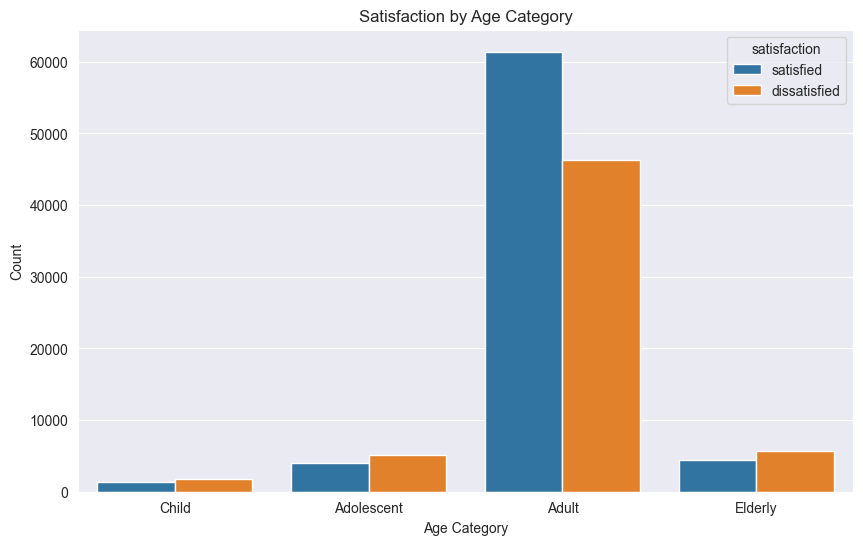

In [16]:
# create a new DataFrame from the 'df' DataFrame
df_age = df[['Age', 'satisfaction']]

# create a function to map ages to categories
def age_category(age):
    if age <= 10:
        return 'Child'
    elif age <= 19:
        return 'Adolescent'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

# create a new column 'Age Category' based on 'Age' column
df_age['Age Category'] = df_age['Age'].apply(age_category)

ageorder = ['Child', 'Adolescent', 'Adult', 'Elderly']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
# create a countplot of the number of satisfied individuals in each age category
sns.countplot(data=df_age, x='Age Category', hue='satisfaction', order=ageorder)

# add titles and labels
plt.title('Satisfaction by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# show the plot
plt.show()

/var/folders/n4/30t414nd14sglwq8kshvsggw0000gn/T/ipykernel_7122/857913544.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Adult Category'] = df_age['Age'].apply(adult_category)


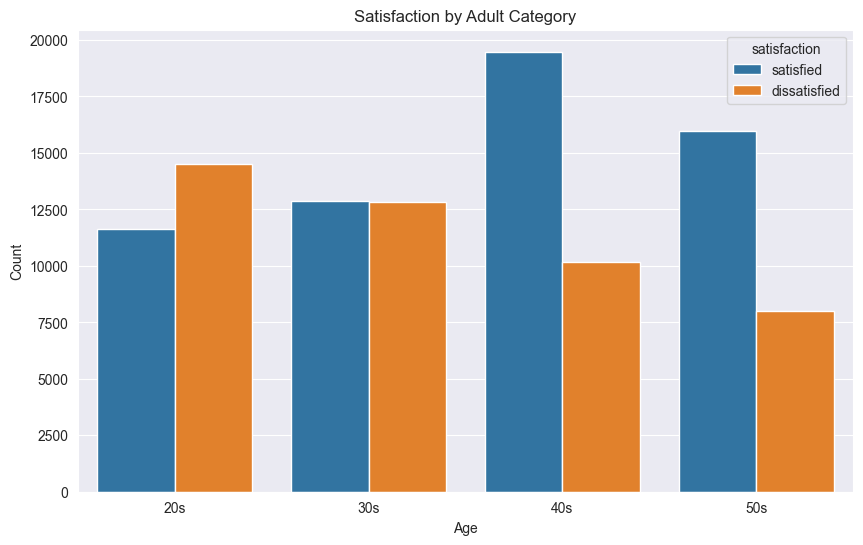

In [17]:
# define a function to map ages to adult categories
def adult_category(age):
    if age <= 19:
        return 'not adult'
    elif age <= 29:
        return '20s'
    elif age <= 39:
        return '30s'
    elif age <= 49:
        return '40s'
    elif age <= 59:
        return '50s'
    else:
        return 'others'

# create a new DataFrame from the 'df' DataFrame
df_age = df[['Age', 'satisfaction']]

# create a new column 'Adult Category' based on 'Age' column
df_age['Adult Category'] = df_age['Age'].apply(adult_category)

# filter the DataFrame to exclude rows where 'Adult Category' is 'not adult' or '>60 yo'
df_age_filtered = df_age[(df_age['Adult Category'] != 'not adult') & (df_age['Adult Category'] != 'others')]

adultorder = ['20s','30s','40s','50s']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
# create a countplot of the number of satisfied individuals in each adult category
sns.countplot(data=df_age_filtered, x='Adult Category', hue='satisfaction',order=adultorder)

# add titles and labels
plt.title('Satisfaction by Adult Category')
plt.xlabel('Age')
plt.ylabel('Count')

# show the plot
plt.show()


## Flight Distance

In [18]:
df_dist = df[['Flight Distance', 'satisfaction']]
df_dist['Distance (km)'] = df_dist['Flight Distance'] * 1.60934

def distance_category(distance):
    if distance < 1000:
        return '1,100–1,500 km'
    elif distance < 4100:
        return '1,500 - 4,099 km' #ini klo diubah jd 4,100 datanya gamau muncul, knp?
    else:
        return '>4,100 km'

df_dist['Distance Category'] = df_dist['Distance (km)'].apply(distance_category)

/var/folders/n4/30t414nd14sglwq8kshvsggw0000gn/T/ipykernel_7122/529848621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['Distance (km)'] = df_dist['Flight Distance'] * 1.60934
/var/folders/n4/30t414nd14sglwq8kshvsggw0000gn/T/ipykernel_7122/529848621.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['Distance Category'] = df_dist['Distance (km)'].apply(distance_category)


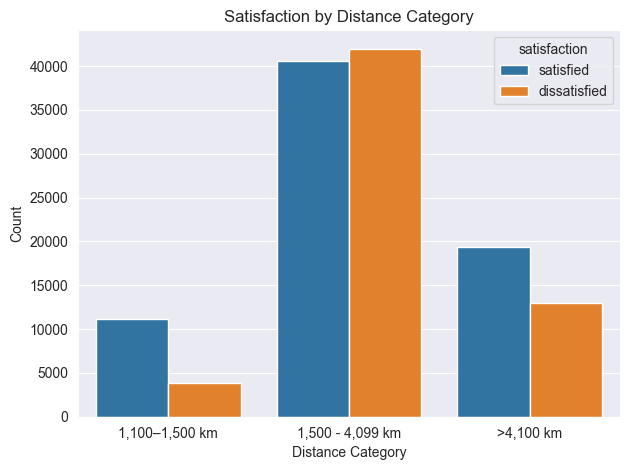

In [19]:
distorder = ['1,100–1,500 km', '1,500 - 4,099 km', '>4,100 km']
sns.countplot(data=df_dist, x='Distance Category', hue='satisfaction', order=distorder)


# add titles and labels
plt.title('Satisfaction by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.tight_layout()

# show the plot
plt.show()

## Delay

### Departure Delay

In [20]:
df_deptdelay = df[['Departure Delay in Minutes', 'satisfaction']]

def dept_delay_category(time):
    if time <= 15:
        return 'Delay <15 mins'
    if time <= 30:
        return 'Delay 15 - 30 mins'
    if time <= 60:
        return 'Delay 30-60 mins'
    else:
        return 'Delay >1 hr'

df_deptdelay['Departure Delay Category'] = df_deptdelay['Departure Delay in Minutes'].apply(dept_delay_category)

/var/folders/n4/30t414nd14sglwq8kshvsggw0000gn/T/ipykernel_7122/3872394401.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deptdelay['Departure Delay Category'] = df_deptdelay['Departure Delay in Minutes'].apply(dept_delay_category)


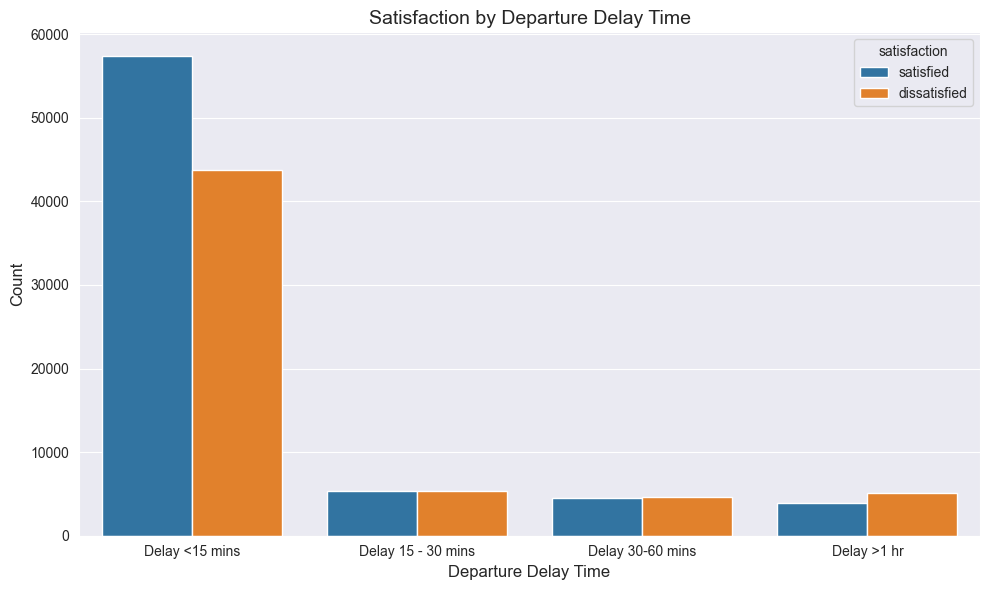

In [21]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_deptdelay, x='Departure Delay Category', hue='satisfaction', order=deptorder)

# add titles and labels
plt.title('Satisfaction by Departure Delay Time', fontsize=14)
plt.xlabel('Departure Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# show the plot
plt.show()

### Arrival Delay

/var/folders/n4/30t414nd14sglwq8kshvsggw0000gn/T/ipykernel_7122/4173682382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arvdelay['Arrival Delay Category'] = df_arvdelay['Arrival Delay in Minutes'].apply(dept_delay_category)


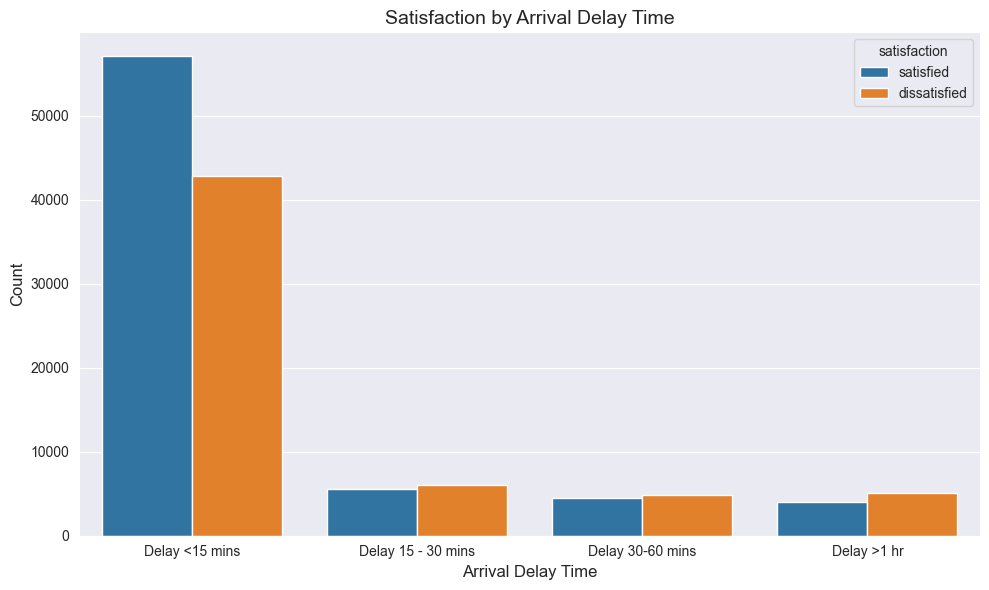

In [22]:
df_arvdelay = df[['Arrival Delay in Minutes', 'satisfaction']]
df_arvdelay['Arrival Delay Category'] = df_arvdelay['Arrival Delay in Minutes'].apply(dept_delay_category)
     

deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arvdelay, x='Arrival Delay Category', hue='satisfaction', order=deptorder)

# add titles and labels
plt.title('Satisfaction by Arrival Delay Time', fontsize=14)
plt.xlabel('Arrival Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# show the plot
plt.show()

# Splitting Dataset

In [23]:
df = df_encoded
X = df.drop(['satisfaction'], axis=1) #Remove ID because we will not use the feature
y = df['satisfaction']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)

Shape of training set  (103904, 27)
Shape of test set  (25976, 27)


In [24]:
classifiers = [KNeighborsClassifier(n_neighbors=5),
              RandomForestClassifier(n_estimators=100, random_state=42), 
              GradientBoostingClassifier(n_estimators=100, random_state=42)]

reports = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)
    df = pd.DataFrame(report).transpose()
    reports.append(df)

# Concatenate the list of DataFrames into a single DataFrame
result = pd.concat(reports, keys=[clf.__class__.__name__ for clf in classifiers])

result

precision    recall  f1-score  \
KNeighborsClassifier       0              0.724211  0.750988  0.737356   
                           1              0.687145  0.656642  0.671547   
                           accuracy       0.708115  0.708115  0.708115   
                           macro avg      0.705678  0.703815  0.704452   
                           weighted avg   0.707367  0.708115  0.707451   
RandomForestClassifier     0              0.970359  0.956322  0.963289   
                           1              0.948455  0.964927  0.956620   
                           accuracy       0.960233  0.960233  0.960233   
                           macro avg      0.959407  0.960625  0.959955   
                           weighted avg   0.960405  0.960233  0.960259   
GradientBoostingClassifier 0              0.932962  0.933884  0.933423   
                           1              0.920526  0.919434  0.919980   
                           accuracy       0.927318  0.927318  0.927318   
                           macro avg      0.926744  0.926659  0.926701   
                           weighted avg   0.927311  0.927318  0.927314   

                                              support  
KNeighborsClassifier       0             14172.000000  
                           1             11804.000000  
                           accuracy          0.708115  
                           macro avg     25976.000000  
                           weighted avg  25976.000000  
RandomForestClassifier     0             14172.000000  
                           1             11804.000000  
                           accuracy          0.960233  
                           macro avg     25976.000000  
                           weighted avg  25976.000000  
GradientBoostingClassifier 0             14172.000000  
                           1             11804.000000  
                           accuracy          0.927318  
                           macro avg     25976.000000  
                           weighted avg  25976.000000